In [1]:
from nltk.corpus import reuters
from nltk import FreqDist, SnowballStemmer
import string
from nltk.corpus import stopwords

No. of documents:  10788


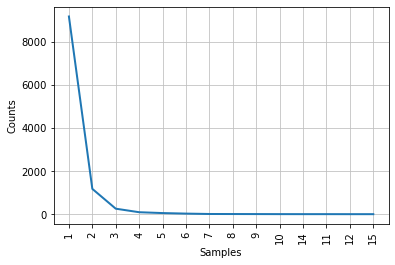

In [2]:
# Use Reuters corpus in NLTK.

# Number of files and categories in corpus
 
print("No. of documents: ", len(reuters.fileids()))
cats = [ reuters.categories(f) for f in reuters.fileids() ]
cat_num = [ len(c) for c in cats ] # number of cats in 1 file 
fd_num = FreqDist(cat_num)
fd_num.plot()

In [3]:
reuters

<CategorizedPlaintextCorpusReader in 'C:\\Users\\User\\AppData\\Roaming\\nltk_data\\corpora\\reuters.zip/reuters/'>

In [4]:
cats[:25]

[['trade'],
 ['grain'],
 ['crude', 'nat-gas'],
 ['corn', 'grain', 'rice', 'rubber', 'sugar', 'tin', 'trade'],
 ['palm-oil', 'veg-oil'],
 ['ship'],
 ['coffee', 'lumber', 'palm-oil', 'rubber', 'veg-oil'],
 ['grain', 'wheat'],
 ['gold'],
 ['acq'],
 ['tin'],
 ['interest', 'money-fx'],
 ['acq', 'copper'],
 ['ipi'],
 ['carcass',
  'corn',
  'grain',
  'livestock',
  'oilseed',
  'rice',
  'soybean',
  'trade'],
 ['earn'],
 ['earn'],
 ['interest', 'money-fx'],
 ['bop', 'trade'],
 ['gas', 'lead'],
 ['acq'],
 ['jobs'],
 ['earn'],
 ['earn'],
 ['earn']]

In [5]:
# Number of documents in each category
# FreqDist() can be used to find the answer, but we need to flatten the list of categories first.
cats_flat = [ c for l in cats for c in l ] # flattening as there are multiple cats per doc 
fd_cat = FreqDist(cats_flat)
# how many categories in total
print (len(fd_cat))
fd_cat.most_common(10)

90


[('earn', 3964),
 ('acq', 2369),
 ('money-fx', 717),
 ('grain', 582),
 ('crude', 578),
 ('trade', 485),
 ('interest', 478),
 ('ship', 286),
 ('wheat', 283),
 ('corn', 237)]

In [6]:
# Pick two categories and visualize the articles in each category using word cloud
grain = reuters.fileids('grain')
trade = reuters.fileids('trade')

grain_tok = [ reuters.words(f) for f in grain ] 
trade_tok = [ reuters.words(f) for f in trade ] 

In [7]:
grain[:5]

['test/14828', 'test/14832', 'test/14841', 'test/14858', 'test/15033']

In [8]:
grain_tok[:5]

[['CHINA', 'DAILY', 'SAYS', 'VERMIN', 'EAT', '7', '-', ...],
 ['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...],
 ['SRI', 'LANKA', 'GETS', 'USDA', 'APPROVAL', 'FOR', ...],
 ['JAPAN', 'MINISTRY', 'SAYS', 'OPEN', 'FARM', 'TRADE', ...],
 ['ZAMBIA', 'DOES', 'NOT', 'PLAN', 'RETAIL', 'MAIZE', ...]]

In [9]:
# Define a function preprocess() to perform the preprocessing steps given a file (token list):
#   punctuation removal, case lowering, stopword removal, 
#   stemming/lemmatization, further cleaning
stop = stopwords.words('english')+['would', 'could']
snowball = SnowballStemmer('english')

def preprocess(toks):
    toks = [ t.lower() for t in toks if t not in string.punctuation+"’“”" ]
    toks = [t for t in toks if t not in stop ]
    toks = [ t for t in toks if not t.isnumeric() ]
    toks = [ snowball.stem(t) for t in toks ]
    return toks

In [10]:
# Preprocess each file in each category
grain_clean = [ preprocess(f) for f in grain_tok ]
trade_clean = [ preprocess(f) for f in trade_tok ]

# Flatten the list of lists for FreqDist; break the docs
grain_flat = [ c for l in grain_clean for c in l ] # flattening as there are multiple toks per doc 
trade_flat = [ c for l in trade_clean for c in l ]

fd_grain = FreqDist(grain_flat)
fd_trade = FreqDist(trade_flat)

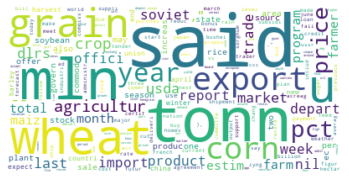

In [11]:
# Generate word clouds for the two categories.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_grain = WordCloud(background_color="white").generate_from_frequencies(fd_grain)
plt.imshow(wc_grain, interpolation='bilinear')
plt.axis("off")
plt.show()

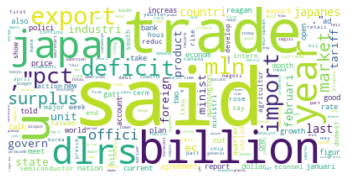

In [12]:
wc_trade = WordCloud(background_color="white").generate_from_frequencies(fd_trade)
plt.imshow(wc_trade, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# Generate TDM

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# sklearn requires the input to be text string
# Switch back to the docs format before flatten 
grain_text = [ ' '.join(f) for f in grain_clean ]

In [14]:
grain_text[:2]

['china daili say vermin eat pct grain stock survey provinc seven citi show vermin consum seven pct china grain stock china daili said also said year mln tonn pct china fruit output left rot mln tonn pct veget paper blame wast inadequ storag bad preserv method said govern launch nation programm reduc wast call improv technolog storag preserv greater product addit paper gave detail',
 'thai trade deficit widen first quarter thailand trade deficit widen billion baht first quarter billion year ago busi econom depart said said janunari march import rose billion baht billion thailand improv busi climat year result pct increas import raw materi semi finish product countri oil import bill howev fell pct first quarter due lower oil price depart said first quarter export expand billion baht billion export growth smaller expect due lower earn mani key commod includ rice whose earn declin pct maiz pct sugar pct tin pct can pineappl seven pct product regist high export growth jewelleri pct cloth p

In [15]:
grain_clean[:2]

[['china',
  'daili',
  'say',
  'vermin',
  'eat',
  'pct',
  'grain',
  'stock',
  'survey',
  'provinc',
  'seven',
  'citi',
  'show',
  'vermin',
  'consum',
  'seven',
  'pct',
  'china',
  'grain',
  'stock',
  'china',
  'daili',
  'said',
  'also',
  'said',
  'year',
  'mln',
  'tonn',
  'pct',
  'china',
  'fruit',
  'output',
  'left',
  'rot',
  'mln',
  'tonn',
  'pct',
  'veget',
  'paper',
  'blame',
  'wast',
  'inadequ',
  'storag',
  'bad',
  'preserv',
  'method',
  'said',
  'govern',
  'launch',
  'nation',
  'programm',
  'reduc',
  'wast',
  'call',
  'improv',
  'technolog',
  'storag',
  'preserv',
  'greater',
  'product',
  'addit',
  'paper',
  'gave',
  'detail'],
 ['thai',
  'trade',
  'deficit',
  'widen',
  'first',
  'quarter',
  'thailand',
  'trade',
  'deficit',
  'widen',
  'billion',
  'baht',
  'first',
  'quarter',
  'billion',
  'year',
  'ago',
  'busi',
  'econom',
  'depart',
  'said',
  'said',
  'janunari',
  'march',
  'import',
  'rose',

In [16]:
# Create a matrix using term frequency first using CountVectorizer
# The result is in sparse matrix format
vec_tf = CountVectorizer()
grain_tf = vec_tf.fit_transform(grain_text)
# print(grain_tf[:2])

In [17]:
vec_tf.get_feature_names()[:20]

['1960s',
 '1970s',
 '2und',
 '5c',
 'abandon',
 'abastecimento',
 'abastecimiento',
 'abil',
 'abl',
 'abnorm',
 'abolish',
 'abolit',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'abund',
 'abus',
 'acceler',
 'accept']

In [18]:
# index of a specific word
vec_tf.vocabulary_["grain"]

1576

In [19]:
# to convert it to a normal array
grain_tf_m = grain_tf.toarray()

In [20]:
# set a minimum DF
vec_tf_2 = CountVectorizer(min_df = 2) # min_df = 2 means ignore terms that appear in < 2 documents 
# min_df = 0.01 means ignore terms that appear in < 1% of documents 
grain_tf_2 = vec_tf_2.fit_transform(grain_text)
grain_tf_2

<582x2491 sparse matrix of type '<class 'numpy.int64'>'
	with 32607 stored elements in Compressed Sparse Row format>

In [21]:
# activate stopword removal
vec_tf_3 = CountVectorizer(min_df = 2, stop_words='english')
grain_tf_3 = vec_tf_3.fit_transform(grain_text)
grain_tf_3

<582x2392 sparse matrix of type '<class 'numpy.int64'>'
	with 29950 stored elements in Compressed Sparse Row format>

In [22]:
vec_bin = CountVectorizer(min_df = 2)
grain_bin = vec_bin.fit_transform(grain_text)
grain_bin.toarray()[:20, :20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
# for binary indexing, set "binary=True"
vec_bin = CountVectorizer(binary=True, min_df = 2)
grain_bin = vec_bin.fit_transform(grain_text)
grain_bin.toarray()[:20, :20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
# tfidf indexing
vec_tfidf = TfidfVectorizer(min_df = 2)
grain_tfidf = vec_tfidf.fit_transform(grain_text)
grain_tfidf
grain_tfidf.toarray()[:10, :20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [25]:
# save the vectorized results for future use
import pickle
pickle.dump(grain_tfidf, open("edmundchong-tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("feature.pkl","wb"))

In [26]:
# load the content
loaded_vec = TfidfVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))
tfidf = pickle.load(open("edmundchong-tfidf.pkl", "rb" ) )
tfidf

<582x2491 sparse matrix of type '<class 'numpy.float64'>'
	with 32607 stored elements in Compressed Sparse Row format>